In [1]:
import plons
import os
import numpy as np
import matplotlib.pyplot        as plt

import plons.ConversionFactors_cgs        as cgs
import plons.AccrDisk                     as ad

timeUnit = 1.5916424E-01 #yrs

In [4]:
dumps = np.array([500])
for x in range(0,10):
    dumps = np.append(np.array(dumps[0]-50),dumps)

In [5]:
print(dumps)

[  0  50 100 150 200 250 300 350 400 450 500]


In [142]:
dumps = np.array([600])
for x in range(0,10):
    dumps = np.append(np.array(dumps[0]-16),dumps)

In [5]:
dumps = np.array([408])
for x in range(0,12):
    dumps = np.append(np.array(dumps[0]-32),dumps)

In [6]:
print(dumps)

[ 24  56  88 120 152 184 216 248 280 312 344 376 408]


In [2]:
def getRMHfromFile(dumps,model,SH):
    loc = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/forEvolution/plotsAnalysis/'
    radii  = []
    masses = []
    H2s    = []
    for dump in dumps:
        file  = 'infoAccrDisk_wind_00'+str(dump)+'_'+str(SH)+'.txt'
        file_name = os.path.join(loc, file)
        with open(file_name, 'r') as f:
            lines = f.readlines()  
            info = []
            for i in range(len(lines)):
                info.append(lines[i].split())
            radii  = np.append(radii,float(info[4][4]))
            masses = np.append(masses,float(info[5][5]))
            H2s    = np.append(H2s,float(info[6][6]))
    return (radii,masses,H2s)

In [26]:
def plot_ev_disk(modelNames,dumps,SH):
    times = timeUnit*dumps
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    colors = ['firebrick','goldenrod','navy']
    i = 0
    lineStyles = ['-.','--','-',':']
    
    for model in modelNames:
        radii,masses,H2s = getRMHfromFile(dumps,model,SH)
        ax1.plot(times[:],masses[:],linestyle = lineStyles[i], color = colors[i], label = str(model))
        ax2.plot(times[1:],radii[1:],linestyle = lineStyles[i], color = colors[i], label = str(model))
        ax3.plot(times[1:],H2s[1:],linestyle = lineStyles[i], color = colors[i], label = str(model))
        i = i+1

    ax1.legend(fontsize = 12)
    ax1.set_ylabel('Mdisk [Msun]',fontsize = 12)
    ax1.set_xlabel('t [yrs]',fontsize = 12)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    fig1.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/e00Models_diskMassEv_'+str(SH)+'.png')


    ax2.set_ylabel('Rdisk [au]',fontsize = 12)
    ax2.set_xlabel('t [yrs]',fontsize = 12)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.legend(fontsize = 12,loc='upper right')
    fig2.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/e00Models_diskRadiusEv_'+str(SH)+'.png')


    ax3.set_ylabel(str(SH)+'[au]',fontsize = 12)
    ax3.set_xlabel('t [yrs]',fontsize = 12)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)
    ax3.legend(fontsize = 12,loc='upper right')
    fig3.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/e00Models_diskMassAcRaEv_'+str(SH)+'.png')
    print(times[0],times[-1])

3.8199417600000003 95.49854400000001


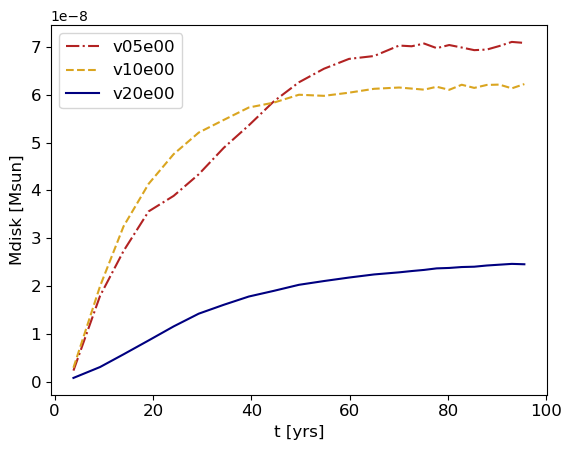

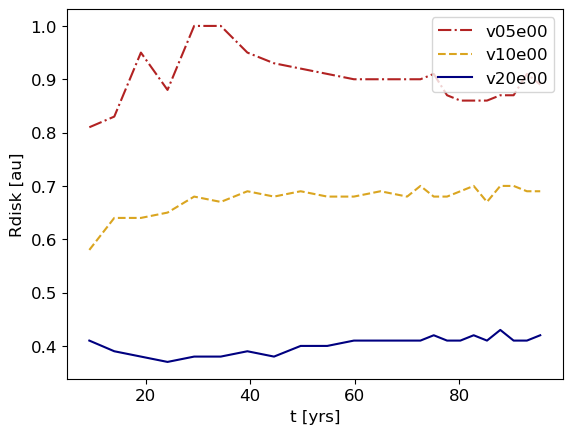

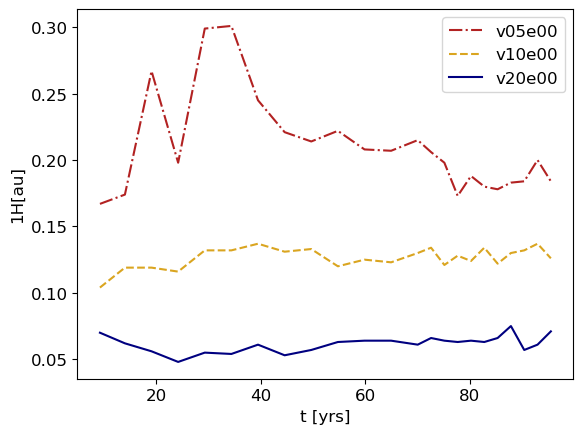

In [27]:
modelNames = ['v05e00','v10e00','v20e00']
dumps = np.array([24, 58, 88, 120, 152, 184, 216, 248, 280, 312, 344, 376, 408, 440, 456, 472, 488, 504, 520, 536, 552, 568, 584, 600])
SH = '1H'
plot_ev_disk(modelNames,dumps,SH)

In [13]:
def calcMassAccrRateDisk(Masses,times):
    MaccrRs = np.array([])
    for i in range(len(Masses)-1):
        MaccrR  = (Masses[i+1]-Masses[i])/(times[i+1]-times[i])
        MaccrRs = np.append(MaccrRs,MaccrR)
    return MaccrRs

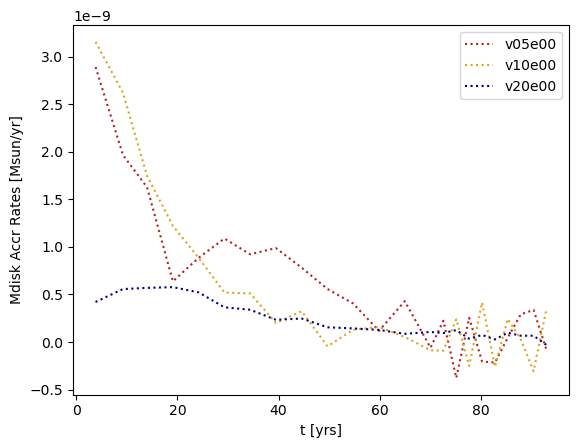

In [60]:
times = timeUnit*dumps
fig = plt.figure()
colors = ['firebrick','goldenrod','navy']
modelNames = ['v05e00','v10e00','v20e00']
SH = '1H'
i = 0
for model in modelNames:
    radii,masses,H2s = getRMHfromFile(dumps,model,SH)
    
    plt.plot(times[:-1],calcMassAccrRateDisk(masses,times),':', color = colors[i], label = str(model))
    i = i+1
    
plt.legend()
plt.ylabel('Mdisk Accr Rates [Msun/yr]')
plt.xlabel('t [yrs]')
fig.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/e00Models_diskMassAcRaEv'+str(SH)+'.png')


Text(0, 0.5, 'Maccr in disk [Msun/yr]')

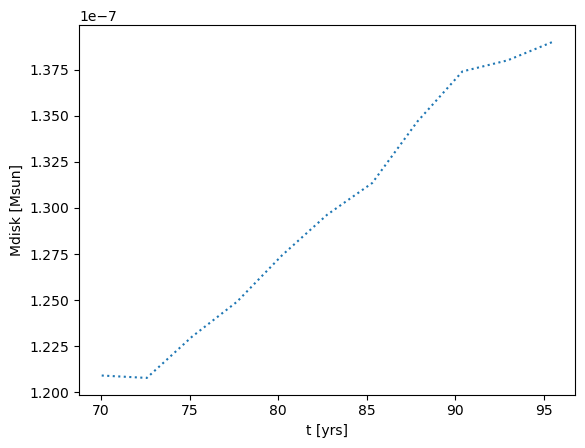

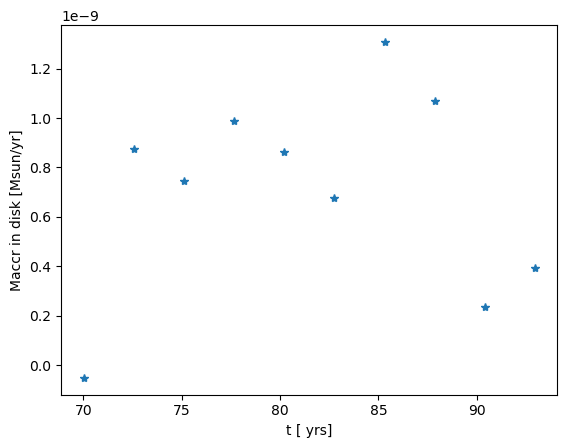

In [26]:
#v10e00, 2H
# dumps = np.array([270,272,276,280,284,288,292,296,300])
# Masses = np.array([1.2091e-07,1.2078e-07,1.2301e-07,1.2491e-07,1.2743e-07,1.2963e-07,1.3135e-07,1.3468e-07,1.374e-07,1.38e-7,1.39e-7])
Masses = np.array([3.23e-08,3.264e-08,]
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,':')
plt.ylabel('Mdisk [Msun]')
plt.xlabel('t [yrs]')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')
plt.xlabel('t [ yrs]')
plt.ylabel('Maccr in disk [Msun/yr]')

array([2.92599824e-09, 3.07858097e-09, 4.75138134e-09])

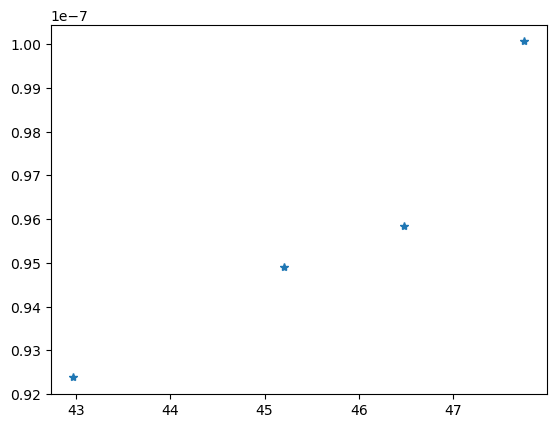

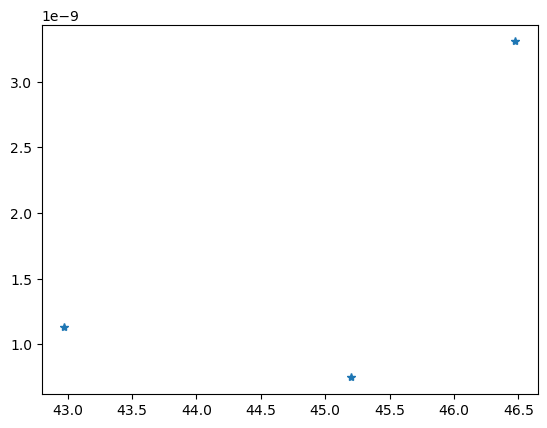

In [28]:
#v05e00, 2H
dumps = np.array([270,284,292,300])
Masses = np.array([9.238e-08,9.49e-08,9.585e-08,1.0006e-07])
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,'*')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')

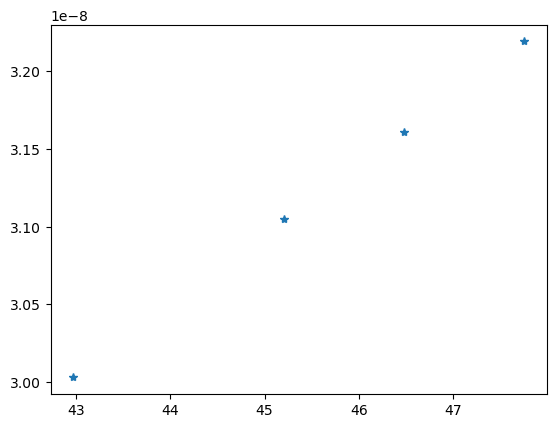

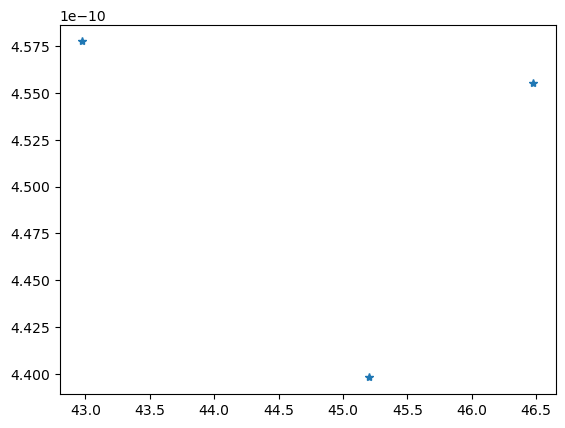

In [29]:
#v20e00, 2H
dumps = np.array([270,284,292,300])
Masses = np.array([3.003e-08,3.105e-08,3.161e-08,3.219e-08])
times = timeUnit*dumps
plt.figure()
plt.plot(times,Masses,'*')
plt.figure()
plt.plot(times[:-1],calcMassAccrRateDisk(Masses,times),'*')